In [104]:
from diagrams import Diagram, Node
from Bio import SeqIO

Lets collect some exons' data.  
  
`exons_lenght` defines the length of the exons. 

In [93]:
exons_length = []

try:
    SeqIO.parse("./Data/FHOD3/NM_001281740.3.exons.fa", "fasta")
except Exception as e:
    print(f"Cannot parse FASTA-file", e)

for seq_record in SeqIO.parse("./Data/FHOD3/NM_001281740.3.exons.fa", "fasta"):
    target = seq_record.seq
    exons_length.append(len(target))
exons_length

[288,
 107,
 65,
 68,
 106,
 95,
 112,
 95,
 144,
 239,
 90,
 360,
 75,
 114,
 135,
 51,
 215,
 297,
 884,
 159,
 183,
 120,
 162,
 191,
 193,
 24,
 175,
 162,
 773]

Here we manually change length of the exons according to their coding part.

In [80]:
exons_length[0] = exons_length[0] - 123

Here is a little part to check exon lengths and the reading frame position.

In [81]:
symbols = ["|", ">", "<"]
end_symbol = 0
for i in exons_length:
    print("--", end ="")
    print(symbols[end_symbol], "", end = "")
    print(i, end = "")
    end_symbol = (end_symbol + i) %3
    print("", symbols[end_symbol], end ="")
    print("--", end ="")

--| 165 |----| 107 <----< 65 >----> 68 |----| 106 >----> 95 |----| 112 >----> 95 |----| 144 |----| 239 <----< 90 <----< 360 <----< 75 <----< 114 <----< 135 <----< 51 <----< 215 >----> 297 >----> 884 |----| 159 |----| 183 |----| 120 |----| 162 |----| 191 <----< 193 |----| 24 |----| 175 >----> 162 >----> 773 |--

We specify here labels and types of exons pictures.

In [153]:
labels = list(range(1, 1+len(exons_length)))
types = []

end_symbol = 0
for i in exons_length:
    start_of_this_ex = symbols[end_symbol]
    end_symbol = (end_symbol + i) %3
    end_of_this_ex = symbols[end_symbol]
    this_exon = start_of_this_ex + end_of_this_ex
    types.append(this_exon)
    
if len(labels) != len(types):
    raise(RuntimeError("The length of label list is different from the length of the type list!"))

And this is the graph parameters

`max_line_length` defines the number of nodes in each row

In [83]:
max_line_length = 10

Here we define the GraphViz attributes

The documentation can be found at https://www.graphviz.org/doc/info/attrs.html

Only graph, node and edge attributes are supported in Diagrams

In [156]:
graph_attr = {
    'fontsize': '32'
}

node_attr = {
    'labelloc': 'c',  # Label in the center of the node
    'fontsize': '32',
    'fontname': 'Helvetica',
    'fixedsize': 'true',
    'imagescale': 'both', 
    'height': '2',
    "penwidth": "0",
    "width": "2"
}

edge_attr = {
    'penwidth': '7',
    'color': "#197a1e",
}

This is just a function to make creating nodes easier

With it we just need a label and a node type

In [171]:
def create_node(type, label):
    node_types = {
        "||": "./Data/node_types/square.png",
        "|>": "./Data/node_types/1.png",
        "|<": "./Data/node_types/6_2.png",
        "<<": "./Data/node_types/7_2.png",
        "<|": "./Data/node_types/3.png",
        "<>": "./Data/node_types/8.png",
        "><": "./Data/node_types/2_2.png",
        ">|": "./Data/node_types/4_2.png",
        ">>": "./Data/node_types/5_2.png"
    }
    local_attr = node_attr.copy()
    local_attr["image"] = node_types[type]
    node_label = str(label)
    if type[0] == '>':
        node_label = '   ' + node_label
    if type[1] == '<':
        node_label += '   '
        
    try:
        return Node(node_label, **local_attr)
    except KeyError:
        print(f"Wrong node type: {type}")
        return None


Here we divide the input to get several rows in the correct order (from top to bottom).
The default is to render the nodes in the reverse declaration order.

You can change the `max_line_length` parameter to get a better image

In [172]:
label_rows = []
type_rows = []
for i in range(0, len(labels), max_line_length):
    label_rows.append(labels[i:i + max_line_length])
    type_rows.append(types[i:i + max_line_length])

label_rows.reverse()
type_rows.reverse()

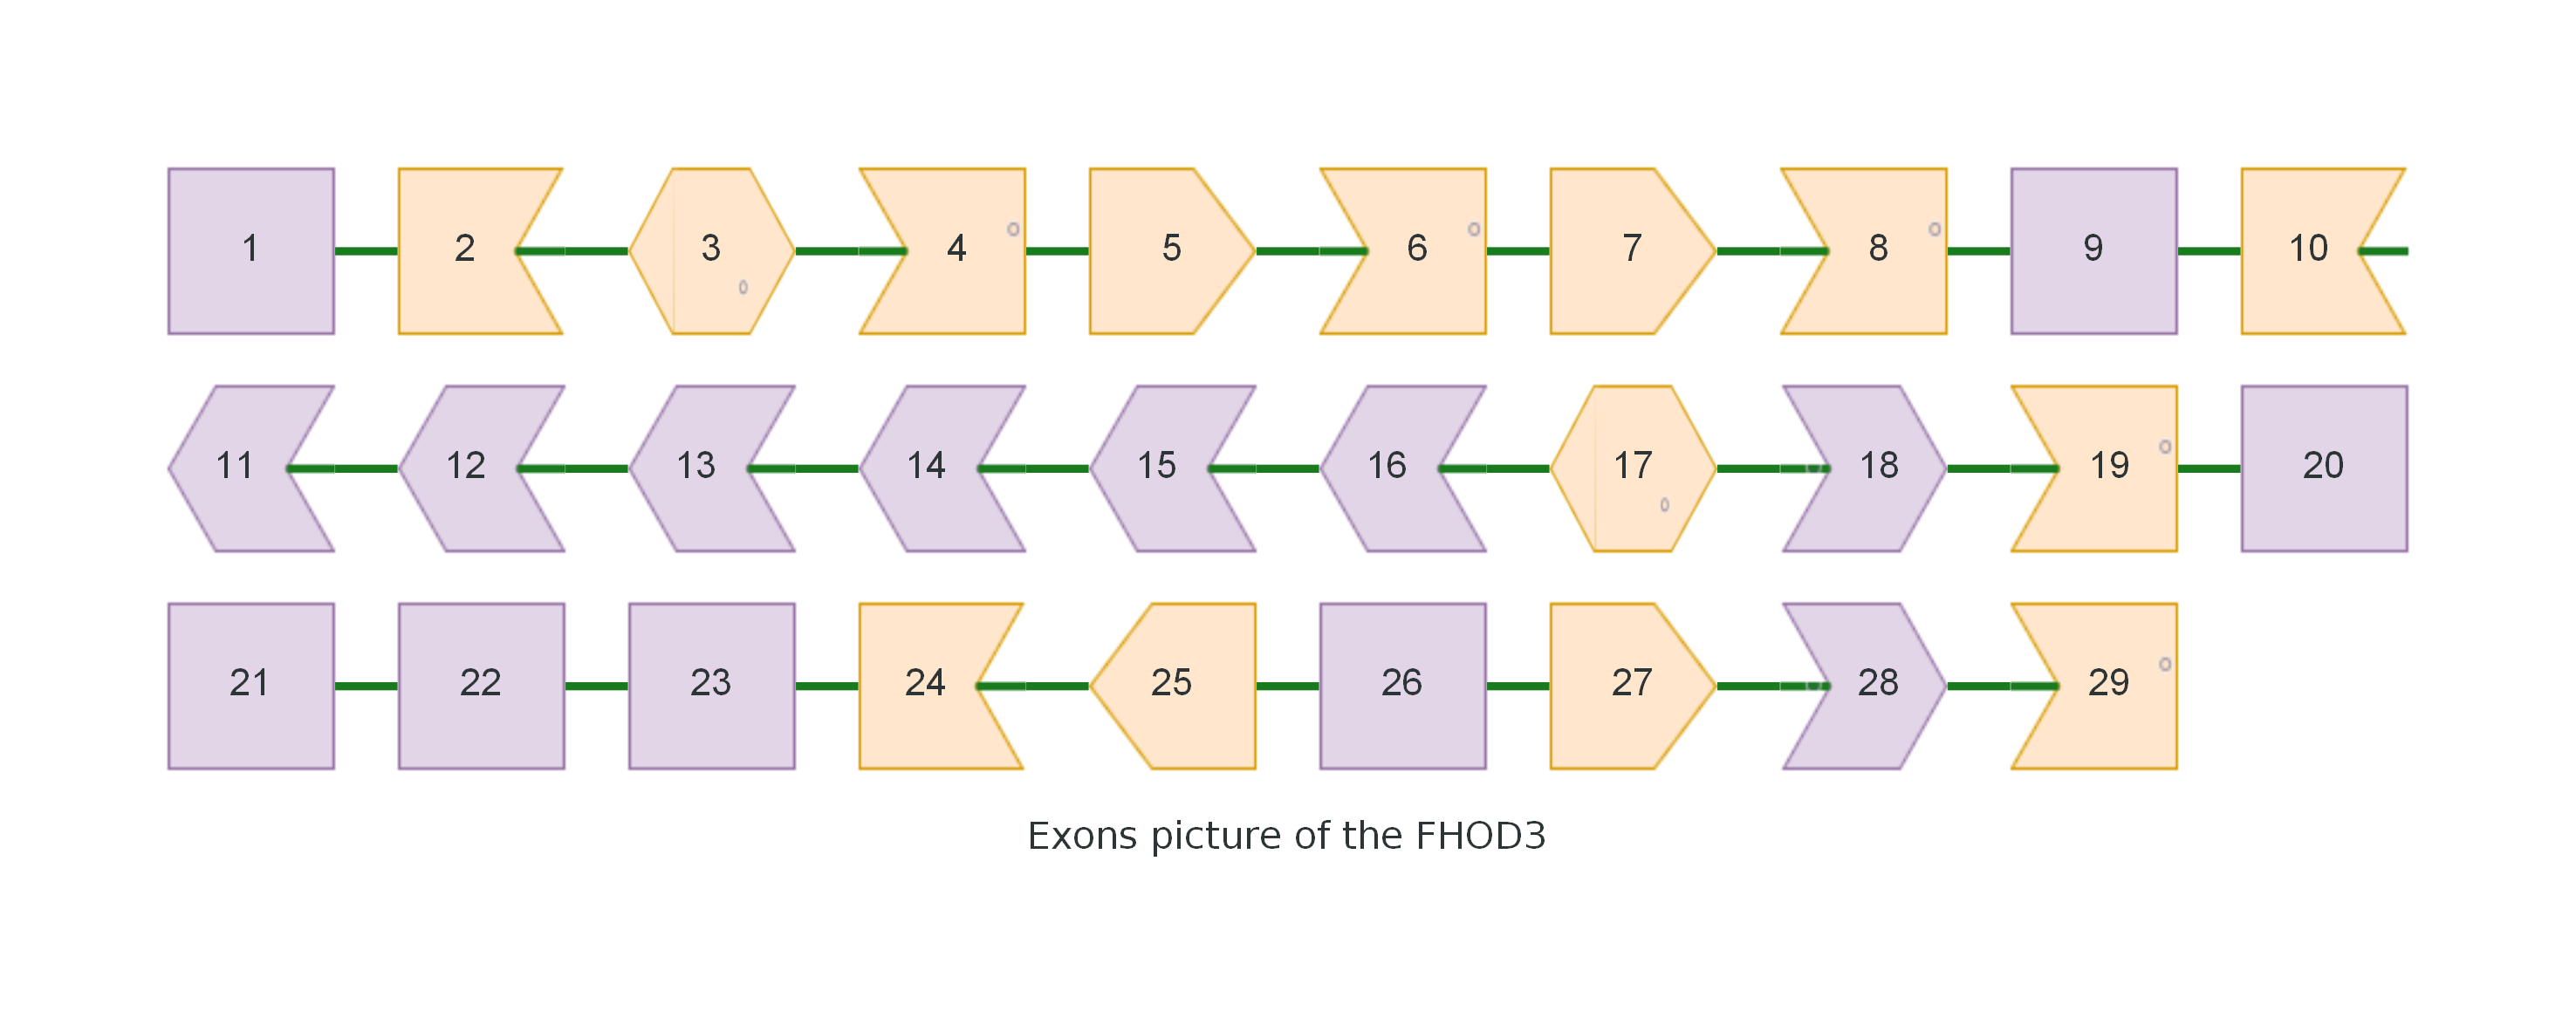

In [173]:
with Diagram("\nExonic structure of the FHOD3 gene", graph_attr=graph_attr, node_attr=node_attr, edge_attr=edge_attr, show=False) as diag:
    for label_row, type_row in zip(label_rows, type_rows):
        node_row = []
        for label, type in zip(label_row, type_row):
            node_row.append(create_node(type, label))
        for i in range(len(node_row) - 1):
            node_row[i] - node_row[i + 1]  # Use >> instead of a - to get the arrow

diag